#Paquetes necesarios

In [79]:
import cvzone
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from cvzone.ColorModule import ColorFinder
import math


moneda de 50 cent

50
moneda de 1€

150
moneda de 20 cent

170
moneda de 5 cent

175
moneda de 10 cent

185
moneda de 2 cent

187
moneda de 1 cent

188
Total en monedas: 188


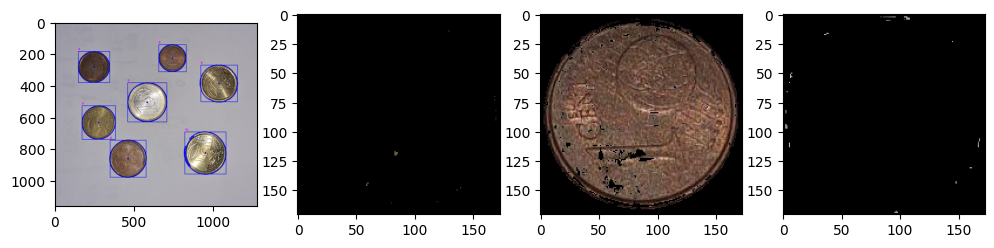

In [98]:
colorFinder = ColorFinder(False)
hsvValsGold = {'hmin':19, 'smin':45, 'vmin':53, 'hmax':179, 'smax':251, 'vmax': 255}
hsvValsBrown = {'hmin': 0, 'smin': 59, 'vmin': 0, 'hmax': 15, 'smax': 255, 'vmax': 255}
hsvValsSilver = {'hmin': 19, 'smin': 0, 'vmin': 70, 'hmax': 50, 'smax': 37, 'vmax': 255}

totalValue=0

def calculoPx2toCm2(image, area):
    resolucion = image.info["dpi"]
    densidad_pixeles_cm = resolucion * 2.54
    area_cm2 = area / (densidad_pixeles_cm ** 2)
    return area_cm2

def preProcessing(img):
    imgPre =cv2.GaussianBlur(img, (7,7), 3)
    imgPre = cv2.Canny(imgPre, 40, 180)

    kernel = np.ones((3,3), np.uint8)
    imgPre = cv2.dilate(imgPre, kernel, iterations=1)

    imgPre = cv2.morphologyEx(imgPre, cv2.MORPH_CLOSE, kernel)
    return imgPre


img = cv2.imread("monedas7.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgPre = preProcessing(img_gris)
imgContours, conFound = cvzone.findContours(img, imgPre, minArea=30)

if conFound:
    for contour in conFound:
        peri = cv2.arcLength(contour['cnt'], True)
        approx = cv2.approxPolyDP(contour['cnt'], 0.02 * peri, True)
        if len(approx) >5:
            # print('Area=' + str(contour['area']) )
            # print('area cm2' + str(calculoPx2toCm2(img, contour['area'])))

            area = contour['area']
            x, y, w, h = contour['bbox']
            imgCrop = img[y:y+h, x:x+w]
                        

            imgColor, mask = colorFinder.update(imgCrop, hsvValsGold)
            imgColor2, mask2 = colorFinder.update(imgCrop, hsvValsBrown)
            imgColor3, mask3 = colorFinder.update(imgCrop, hsvValsSilver)

            pixelsCountGold = cv2.countNonZero(mask)
            pixelsCountBrown = cv2.countNonZero(mask2)
            pixelsCountSilver = cv2.countNonZero(mask3)

            # print(pixelsCountGold)
            
            # print('PixelsGold=' +  str(pixelsCountGold))
            # print('PixelsSilver=' +  str(pixelsCountSilver))
            # print('PixelsGold=' +  str(pixelsCountGold))
            # print('PixelsBrown=' +  str(pixelsCountBrown))
            
            # print(pixelsCountSilver)
            # cv2.imshow("nada", imgCrop)
            if pixelsCountBrown > 11000:
                if area > 33000:
                    # monedas de 5 cent
                    print('moneda de 5 cent')
                    totalValue +=5
                    # cv2.imshow("nada", imgCrop)
                elif area < 25000:
                    # monedas de 1 cent
                    print('moneda de 1 cent')
                    totalValue +=1
                    # cv2.imshow("nada", imgCrop)
                else:
                    # monedas de 2 cent
                    print('moneda de 2 cent')
                    totalValue +=2
                    # cv2.imshow("nada", imgCrop)
            elif pixelsCountGold > 11000:
                if area > 45000:
                    # monedas de 5o cent
                    print('moneda de 50 cent')
                    totalValue +=50

                elif area > 40000:
                    # monedas de 20 cent
                    print('moneda de 20 cent')
                    totalValue +=20

                else:
                    # monedas de 10 cent
                    print('moneda de 10 cent')
                    totalValue +=10

            elif pixelsCountSilver > 11000:
                 # monedas de 2 cent
                print('moneda de 1€')
                totalValue +=100

            print()
            print(totalValue)
            cv2.imshow("nada", imgCrop)
            if cv2.waitKey(5000) == 27:
                continue



        # print(len(approx))

plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
img_rgb = cv2.cvtColor(imgContours, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
img_rgb2 = cv2.cvtColor(imgColor, cv2.COLOR_BGR2RGB)
plt.subplot(1, 4, 2)
plt.imshow(img_rgb2) 
img_rgb3 = cv2.cvtColor(imgColor2, cv2.COLOR_BGR2RGB)
plt.subplot(1, 4, 3)
plt.imshow(img_rgb3) 
img_rgb4 = cv2.cvtColor(imgColor3, cv2.COLOR_BGR2RGB)
plt.subplot(1, 4, 4)
plt.imshow(img_rgb4) 
print('Total en monedas: ' + str(totalValue))

# imS = cv2.resize(imgContours, (480, 640))                # Resize image
# cv2.imshow("output", imS)  
# imS2 = cv2.resize(imgColor, (480, 640))                # Resize image
# cv2.imshow("output2", imgColor)   
cv2.waitKey(0)
cv2.destroyAllWindows()


In [11]:

import cvzone
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from cvzone.ColorModule import ColorFinder

vid = cv2.VideoCapture(0)
colorFinder = ColorFinder(True)
hsvVals = {'hmin': 10, 'smin': 59, 'vmin': 72, 'hmax': 179, 'smax': 249, 'vmax': 255}

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()
    
    imgColor = colorFinder.update(frameIN, hsvVals)
    cv2.imshow('Fotograma', frameIN)
    cv2.imshow('Fotograma2', imgColor[1])
    if cv2.waitKey(20) == 27:
        break
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'smax': 255, 'vmax': 255}
{'hmin': 0, 'smin': 0, 'vmin': 0, 'hmax': 179, 'sma

In [43]:
# ESTEEEE
import cv2
import cvzone
import numpy as np

# Función callback para los trackbars
def on_change(value):
    global lower_bound, upper_bound
    lower_bound = np.array([cv2.getTrackbarPos("Hue Min", "ColorFinder"),
                            cv2.getTrackbarPos("Sat Min", "ColorFinder"),
                            cv2.getTrackbarPos("Val Min", "ColorFinder")])
    upper_bound = np.array([cv2.getTrackbarPos("Hue Max", "ColorFinder"),
                            cv2.getTrackbarPos("Sat Max", "ColorFinder"),
                            cv2.getTrackbarPos("Val Max", "ColorFinder")])

    # Filtrar la imagen con los valores actuales
    filtered_image = cv2.inRange(hsv_image, lower_bound, upper_bound)

    # Mostrar la imagen filtrada
    cv2.imshow("ColorFinder", filtered_image)

# Cargamos la imagen
image_path = "monedas4.jpg"  # Reemplaza "tu_imagen.jpg" con la ruta de tu imagen
image = cv2.imread(image_path)

# Redimensionar la imagen a un tamaño más pequeño
resize_width = 300
resize_height = 400
image = cv2.resize(image, (resize_width, resize_height))

# Convertir la imagen a espacio de color HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Crear una ventana con trackbars
cv2.namedWindow("ColorFinder")

# Redimensionar la ventana a un tamaño más pequeño
cv2.resizeWindow("ColorFinder", 300, 400)  # Ajusta el tamaño según tus preferencias

cv2.createTrackbar("Hue Min", "ColorFinder", 0, 179, on_change)
cv2.createTrackbar("Hue Max", "ColorFinder", 179, 179, on_change)
cv2.createTrackbar("Sat Min", "ColorFinder", 0, 255, on_change)
cv2.createTrackbar("Sat Max", "ColorFinder", 255, 255, on_change)
cv2.createTrackbar("Val Min", "ColorFinder", 0, 255, on_change)
cv2.createTrackbar("Val Max", "ColorFinder", 255, 255, on_change)

# Variables para los límites inferior y superior
lower_bound = np.array([0, 0, 0])
upper_bound = np.array([179, 255, 255])

# Inicializar con los valores por defecto
on_change(0)

# Mostrar la imagen original
cv2.imshow("ColorFinder", image)

# Esperar a que el usuario ajuste los valores con los trackbars
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:866: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:866: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'
